In this notebook, we try to explore relations between the size ofillustrations and text.

In [72]:
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
with open('data/complete_texts_page_gallica.json', 'r') as fp:
    page_texts = json.load(fp)
with open('data/illu_ratios.json', 'r') as fp:
    ratios = json.load(fp)

In [41]:
len_page_texts = {k: len(v) for k, v in page_texts.items()}

In [42]:
len_page_texts

{'14257_293': 25,
 '14268_20': 3612,
 '14275_400': 0,
 '14317_183': 399,
 '14319_404': 2620,
 '14351_140': 450,
 '14369_168': 318,
 '14374_65': 368,
 '14377_351': 253,
 '14405_32': 108,
 '14458_224': 150,
 '14552_225': 0,
 '14943_417': 135,
 '14967_143': 1448,
 '14977_295': 102,
 '14977_297': 1277,
 '14978_333': 1718,
 '15031_10': 1286,
 '15035_13': 1654,
 '15039_12': 871,
 '15190_170': 444,
 '15299_195': 0,
 '15316_482': 0,
 '15405_339': 71,
 '15678_27': 2650,
 '15678_30': 1331,
 '15678_31': 2713,
 '15691_128': 2686,
 '15996_320': 3048,
 '16304_354': 137,
 '14273_213': 0,
 '14279_124': 135,
 '14279_129': 212,
 '14289_275': 47,
 '14297_333': 237,
 '14312_290': 50,
 '14326_478': 708,
 '14354_811': 287,
 '14364_384': 6094,
 '14458_232': 118,
 '14489_130': 1153,
 '14751_134': 5955,
 '14951_94': 3021,
 '14978_329': 3295,
 '14979_214': 4284,
 '14980_253': 2172,
 '14981_389': 3083,
 '14987_374': 2660,
 '14987_377': 3774,
 '14989_116': 60,
 '14989_120': 217,
 '15039_14': 1308,
 '15062_12': 24

In [38]:
ratios = {k.split("_")[1] + "_" + k.split("_")[2]: v for k, v in ratios.items()}

In [44]:
ratios

{'ILLU_15678_29_0': 0.3847965267645418,
 'ILLU_15678_30_0': 0.44940446435698506,
 'ILLU_15678_31_0': 0.14785834083335248,
 'ILLU_15678_31_1': 0.14826765332276248,
 'ILLU_15678_33_0': 0.2876680433564557,
 'ILLU_15678_32_0': 0.14043945447174164,
 'ILLU_15678_32_1': 0.1314409087748984,
 'ILLU_15678_34_0': 0.2713503265705818,
 'ILLU_15678_36_0': 0.2741079353070177,
 'ILLU_15678_35_0': 0.2659746575757689,
 'ILLU_15678_37_0': 0.16958121019118977,
 'ILLU_15678_38_0': 0.4004441318032644,
 'ILLU_15678_40_0': 0.40181682279229003,
 'ILLU_15678_39_0': 0.09140916979870603,
 'ILLU_15678_42_0': 0.29141096144746836,
 'ILLU_15678_42_1': 0.01903152395910671,
 'ILLU_15678_41_0': 0.3808838584044813,
 'ILLU_15680_58_0': 0.14862867764212195,
 'ILLU_15680_59_0': 0.16603612487520414,
 'ILLU_15680_59_1': 0.15961710018170155,
 'ILLU_15680_60_0': 0.16449421042582807,
 'ILLU_15680_60_1': 0.15841422753257325,
 'ILLU_15680_61_0': 0.1691065433916227,
 'ILLU_15680_62_0': 0.2545364642792388,
 'ILLU_15680_62_1': 0.0647

In [46]:
test = pd.DataFrame()

In [59]:
test["id"] = ratios.keys()
test["ratios"] = ratios.values()
test["len_txt"] = test.apply(lambda row: len_page_texts.get(row["id"].split("_")[1] + "_" + row["id"].split("_")[2], -1), axis=1)

In [61]:
test = test[test["len_txt"]!=-1]

In [62]:
test

,id,ratios,len_txt
0,ILLU_15678_29_0,0.384797,2056
1,ILLU_15678_30_0,0.449404,1331
2,ILLU_15678_31_0,0.147858,2713
3,ILLU_15678_31_1,0.148268,2713
4,ILLU_15678_33_0,0.287668,2883
...,...,...,...
10108,ILLU_14271_148_0,0.205623,0
10109,ILLU_14271_148_1,0.221288,0
10110,ILLU_14271_150_0,0.264195,0
10111,ILLU_14271_150_1,0.168761,0


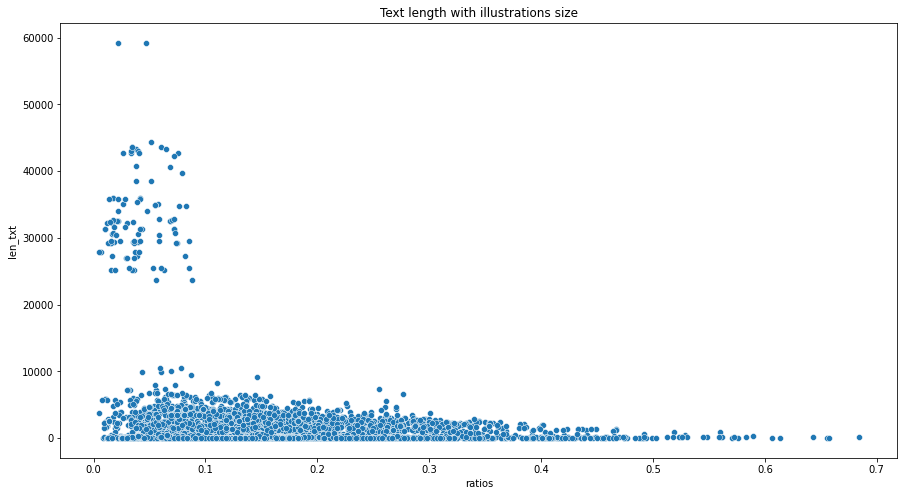

In [78]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=test, x="ratios", y="len_txt").set(title='Text length with illustrations size')